<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/TENSORFLOW/blob/main/dog_vision_kaggle_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### kaggle competitions dog-breed-identification: DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import pandas as pd

In [ ]:
print("tensor_version:" ,tf.__version__,"tensor_hub:",hub.__version__)

tensor_version: 2.7.0 tensor_hub: 0.12.0


**Checking Availablity** 

In [ ]:
print('GPU',"available(yes!!)" if tf.config.list_physical_devices('GPU') else " not available :(")

GPU  not available :(


### IMPORTING FILE
---
**checking import**

In [ ]:
pic=pd.read_csv("/content/drive/MyDrive/DOG_Sight/dog-breed-identification/labels.csv")

In [ ]:
pic[:1]

id        breed
0  000bec180eb18c7604dcecc8fe0dba07  boston_bull

In [ ]:
print(pic.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     8182c860efb9ebf248886c0e70216e01  scottish_deerhound
freq                                   1                 126


In [ ]:
pic.head(10)

id               breed
0  000bec180eb18c7604dcecc8fe0dba07         boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97               dingo
2  001cdf01b096e06d78e9e5112d419397            pekinese
3  00214f311d5d2247d5dfe4fe24b2303d            bluetick
4  0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
5  002211c81b498ef88e1b40b9abf84e1d  bedlington_terrier
6  00290d3e1fdd27226ba27a8ce248ce85  bedlington_terrier
7  002a283a315af96eaea0e28e7163b21b              borzoi
8  003df8b8a8b05244b1d920bb6cf451f9             basenji
9  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound

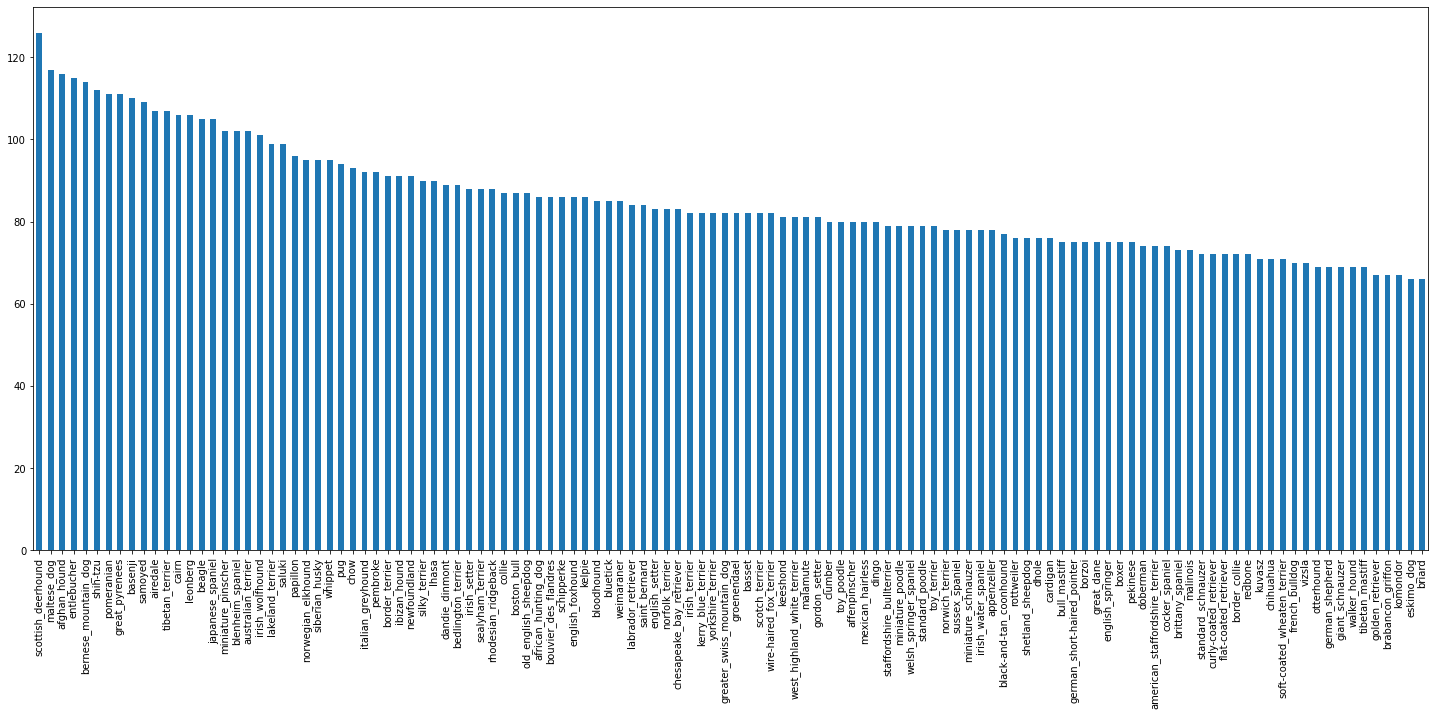

In [ ]:
pic['breed'].value_counts().plot.bar(figsize=(25,10));

In [ ]:
pic['breed'].value_counts().median

<bound method Series.median of scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64>

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 154 kB 7.5 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=d9aacae40a19655449f8dcf56ac03ac6692c163b83d2a23216f6c295f1b01bf3
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [ ]:
from IPython.display import Image

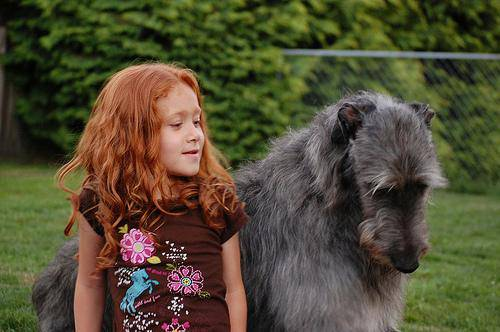

In [ ]:
Image ('/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg')

In [ ]:
filenames=["/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/"+ pict +".jpg"  for pict in pic['id']]

In [ ]:
filenames[:2]

['/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg']

In [ ]:
import os

In [ ]:
if len(filenames)==len(os.listdir("/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train")):
  print('file name match')
else:
  print("check the directory")

file name match


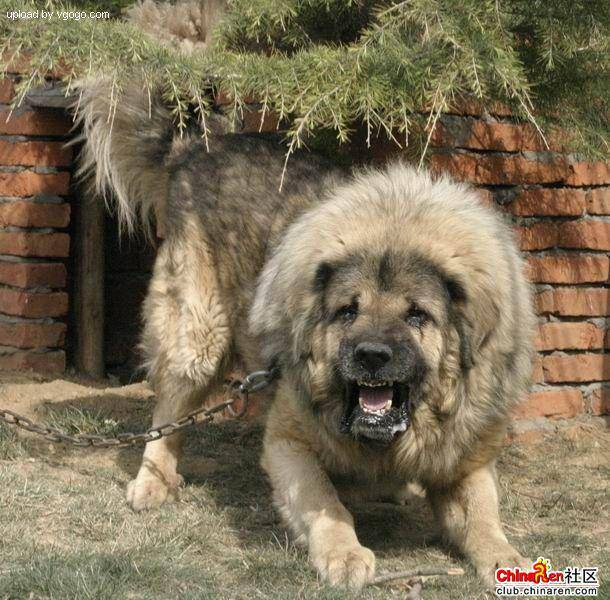

In [ ]:
Image(filenames[9000])

In [ ]:
import numpy as np
breeds = np.array(pic["breed"])

In [ ]:
# total breed
tot_breeds= np.unique(breeds)
len(tot_breeds)

120

In [ ]:
tot_breeds[:11] 

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier'], dtype=object)

In [ ]:
breeds[:11],len(breeds),len(filenames)

(array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
        'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
        'scottish_deerhound', 'shetland_sheepdog'], dtype=object),
 10222,
 10222)

# turning a each breed into array of boolean

In [ ]:
print(tot_breeds[10]),
breeds[10]== tot_breeds[10]

bedlington_terrier


False

In [ ]:
boolean_label = [ breed==tot_breeds for breed in breeds ]


In [ ]:
tot_breeds[:10],breeds[:10]

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle'], dtype=object),
 array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
        'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
        'scottish_deerhound'], dtype=object))

In [ ]:
#for breed in breeds:
  #if breed == tot_breeds:
   # print([ breed==tot_breeds])
 # else:
  #  print("do another method to check")
# error dont run.

In [ ]:
len(boolean_label),boolean_label[:2]

(10222, [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False]),
  array([False, False, Fa

In [ ]:
print(breeds[0])

boston_bull


In [ ]:
print(np.where(tot_breeds==breeds[0]))

(array([19]),)


In [ ]:
print(boolean_label[0].argmax())

19


In [ ]:
print(boolean_label[0].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
x=filenames
y=boolean_label
if len(x)==len(y):
  print(f"x:{len(x)} and y:{len(y)}")
else:
  print("values are not same")

x:10222 and y:10222


In [ ]:
Num_Image= 1000  #@param {type:"slider",min:1000,max:20000,step:1000}
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid= train_test_split(x[:Num_Image],y[:Num_Image],test_size=0.2)
random_seed=21
len(x_train),len(y_train),len(x_valid),len(y_valid)

(800, 800, 200, 200)

In [ ]:
img_size=224
def process_image(image_path,img_size=img_size):
  image=tf.io.read_file(image_path)
  image=tf.image.decode_jpeg(image,channels=3)
  image=tf.image.convert_image_dtype(image,tf.float32)
  image=tf.image.resize(image ,size=[img_size,img_size])
  return image

process_image

<function __main__.process_image>

In [ ]:
def get_img_breeds(image_path,breeds):
  image=process_image(image_path)
  return image,breeds

get_img_breeds

<function __main__.get_img_breeds>

In [ ]:
#get_img_breeds(filenames[21],tf.constant(breeds[21])) #CHECKING 

In [ ]:
x[2],y[2],


('/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, 

**Creating function into batches**

In [ ]:
BATCH_SIZE=32
def create_data_batches(x, y= None, batch_size=BATCH_SIZE, valid_data=False ,test_data=False):
  if test_data:
    print("creating test data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("creating valid data batch")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch=data.map(get_img_breeds).batch(BATCH_SIZE) 
    return data_batch
  
  else:
    print("creating training data")
    data=tf.data.Dataset. from_tensor_slices((tf.constant(x),tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))
    data=data.map(get_img_breeds)
    data_batch=data.batch(BATCH_SIZE)
    return data_batch

  


Create training and validation of the data batches

In [ ]:
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_valid, y_valid, valid_data=True)

creating training data
creating valid data batch


In [ ]:

train_data,val_data

(<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>)

In [ ]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualisinging data batches:


In [ ]:
import matplotlib.pyplot as plt
def show_25_images(images,label):
  plt.figure(figsize=(20,20))
  for i in range(24):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(tot_breeds[label[i].argmax()])
    plt.axis ("off")


In [ ]:
x_train

['/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/02d45a238621c3f2cbde5c1d173ead1e.jpg',
 '/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/086e8ca78ec3303a8f06df003ecb6612.jpg',
 '/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/0fa302727af44e7ad8033825cea98d7c.jpg',
 '/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/10706a4ccdd719191686b98d4dc48ed0.jpg',
 '/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/0450c3899b7ca7cac31406a52c7bc74e.jpg',
 '/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/09ea184490e5da33eb3d851ee6361941.jpg',
 '/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/0e3cdff3560de43a8aa1d9820c211fae.jpg',
 '/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/03b9ab173e5862580909fee10f0ea46d.jpg',
 '/content/drive/MyDrive/DOG_Sight/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/DOG_Sight/dog-breed-identifica

visualising data into training model


In [ ]:
img_size

224

setup input and output shape


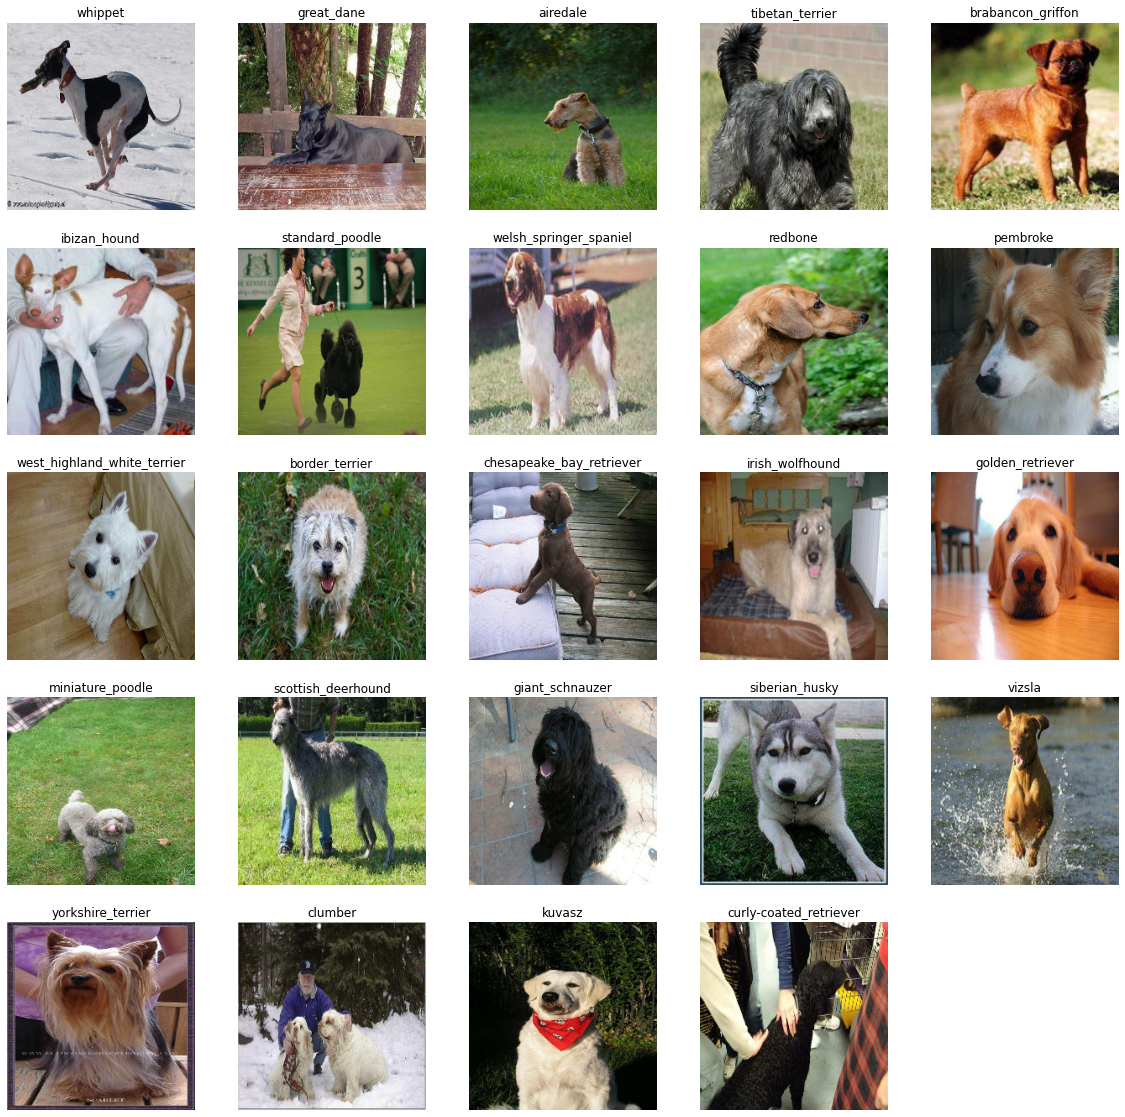

In [ ]:
train_image,train_label=next(train_data.as_numpy_iterator())
show_25_images(train_image,train_label)

In [ ]:
INPUT_SHAPE=[None,img_size,img_size,3]
OUTPUT_SHAPE=len(tot_breeds)
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"


Create a function which build keras function

In [ ]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  #setup model layer
  # Setup the model layers
  model=tf.keras.Sequential([ 
    hub.KerasLayer(MODEL_URL),
    tf.keras.layers.Dense(units= OUTPUT_SHAPE, activation='softmax')
  ])
  
  
  
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
    
  model.build(INPUT_SHAPE)
  return model





In [ ]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# TENSORBOARD_CALLBACK

* Load Tensorboard notebook extension

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard
import  datetime


In [ ]:
def create_tensorboard_callback():
  logdir=os.path.join("/content/drive/MyDrive/DOG_Sight/dog-breed-identification/log",
                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
#np.zeros(shape=(2,4,3))

# Early stopping

In [ ]:
early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=4)                                 

#TRAINING MODEL

In [ ]:
if tf.config.list_physical_devices():
  print("GPU available proceed...")
else:
  print("not available")

GPU available proceed...


In [ ]:
NUM_EPOCHS=10 #@param{type:"slider", min:10, max:1000, step:10}

In [ ]:
  # Return the fitted model  return model
  # Build a function to train and return a trained model
def train_model():
    # Create a model
    model = create_model()

  # Create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
    model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
    return model

In [ ]:
model=train_model()

Epoch 1/10
25/25 [==============================] - 228s 7s/step - loss: 4.4638 - accuracy: 0.1037 - val_loss: 3.2633 - val_accuracy: 0.2500
Epoch 2/10
25/25 [==============================] - 42s 2s/step - loss: 1.5926 - accuracy: 0.7100 - val_loss: 1.9876 - val_accuracy: 0.5650
Epoch 3/10
25/25 [==============================] - 42s 2s/step - loss: 0.5567 - accuracy: 0.9350 - val_loss: 1.5310 - val_accuracy: 0.6250
Epoch 4/10
25/25 [==============================] - 42s 2s/step - loss: 0.2445 - accuracy: 0.9950 - val_loss: 1.3453 - val_accuracy: 0.6700
Epoch 5/10
25/25 [==============================] - 40s 2s/step - loss: 0.1430 - accuracy: 1.0000 - val_loss: 1.2956 - val_accuracy: 0.6650
Epoch 6/10
25/25 [==============================] - 40s 2s/step - loss: 0.0983 - accuracy: 1.0000 - val_loss: 1.2433 - val_accuracy: 0.6700
Epoch 7/10
25/25 [==============================] - 42s 2s/step - loss: 0.0742 - accuracy: 1.0000 - val_loss: 1.2134 - val_accuracy: 0.6750
Epoch 8/10
25/25 [=

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
prediction=model.predict(val_data,verbose=1)


7/7 [==============================] - 8s 1s/step


In [ ]:
prediction[0]

array([1.4629925e-02, 3.2907553e-04, 8.3818717e-04, 2.0514574e-04,
       2.9922259e-04, 1.5344133e-04, 1.9852314e-04, 6.2906020e-04,
       2.8036702e-03, 9.5997090e-03, 4.1725551e-04, 6.8109605e-04,
       3.5225702e-03, 1.9902617e-03, 6.0931106e-05, 2.0328207e-01,
       2.6604717e-05, 1.5455551e-04, 8.9453148e-05, 1.2288984e-02,
       1.3757665e-03, 3.6212310e-02, 6.2066148e-04, 8.0166059e-04,
       1.3247820e-02, 3.7850146e-04, 2.4836155e-04, 1.0526023e-03,
       7.4526705e-02, 1.2886948e-03, 3.6006706e-04, 6.3515466e-04,
       4.2605397e-04, 6.7044899e-04, 9.3894610e-03, 7.6188223e-04,
       1.1006898e-03, 2.3770116e-03, 7.5908313e-03, 5.9640349e-04,
       3.8806256e-04, 7.6101716e-03, 6.0884812e-04, 1.2329369e-03,
       3.2491446e-03, 3.3316847e-03, 2.4822693e-05, 1.4578378e-01,
       3.3182304e-04, 6.1225053e-04, 5.1322422e-04, 3.5539137e-03,
       2.5427021e-04, 4.9314112e-03, 2.2207409e-04, 1.7668906e-03,
       2.5399501e-04, 4.2337994e-03, 2.8696894e-03, 4.8129668e

In [ ]:
#first prediction practice
index=4

print(prediction[index])
print(f"max value(probability of prediction:):{np.max(prediction[index])}")
print(f"sum:{np.sum(prediction[index])}")
print(f"max index:{np.argmax(prediction[index])}")
print(f"predicted label:{tot_breeds[np.argmax(prediction[index])]}")

[7.04804610e-04 2.77945586e-03 1.99661427e-03 1.92503328e-03
 7.54271343e-04 1.04554354e-04 2.43281457e-03 7.90686681e-05
 2.53420712e-05 1.69594074e-04 1.40121760e-04 1.04544080e-04
 2.27993194e-04 1.39839409e-04 2.66000014e-02 8.06599928e-05
 3.02389089e-04 4.73264931e-03 8.77943967e-05 1.20949217e-05
 2.16565579e-02 9.75486415e-04 3.24745327e-02 6.09677017e-01
 4.24644211e-04 6.06198888e-03 1.33935094e-03 1.04629007e-05
 1.45200742e-04 2.72983125e-05 2.21133023e-03 4.36849659e-04
 1.18027674e-03 2.95739109e-03 1.65963836e-04 2.23162048e-03
 2.33257917e-04 1.17800967e-03 1.91950705e-04 4.26408049e-04
 1.38117612e-04 8.42982117e-05 9.53668787e-04 3.85123451e-04
 6.06178655e-05 4.30120599e-05 1.47512497e-03 2.11895476e-05
 3.33765708e-03 1.04049244e-03 4.98647045e-04 4.30329237e-04
 1.53329573e-03 7.64881610e-04 2.26679360e-04 1.18239135e-04
 7.29028741e-03 3.53200757e-03 2.77920684e-04 1.65321934e-03
 1.68896077e-05 2.87452640e-05 1.22635812e-03 2.67412659e-04
 2.20120841e-04 6.255001

In [ ]:
def get_pred_label(prediction_probability):
    return tot_breeds[np.argmax(prediction_probability)]


In [ ]:
#checking
#pred_label=get_pred_label(prediction[6])

#pred_label

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
def unbatch(val_data):
    ids=[]
    breeds=[]
    for image,label in val_data.unbatch().as_numpy_iterator():
        ids.append(image)
        breeds.append(tot_breeds[np.argmax(label)])
    return ids,breeds


In [ ]:
val_ids,val_breeds=unbatch(val_data)
val_ids,val_breeds


([array([[[0.30199423, 0.17258248, 0.13728836],
          [0.2740196 , 0.14460786, 0.10931374],
          [0.31081027, 0.1813985 , 0.14610438],
          ...,
          [0.1727071 , 0.09924757, 0.09284008],
          [0.15458685, 0.10815825, 0.08462884],
          [0.1589285 , 0.11579124, 0.09226183]],
  
         [[0.2646662 , 0.13525441, 0.0999603 ],
          [0.28669468, 0.15728292, 0.12198881],
          [0.29741678, 0.16800502, 0.1327109 ],
          ...,
          [0.16822693, 0.09476741, 0.08835991],
          [0.15711254, 0.1028408 , 0.08095706],
          [0.16344531, 0.1124649 , 0.08893549]],
  
         [[0.27388737, 0.14447562, 0.1091815 ],
          [0.28355125, 0.15413947, 0.11884536],
          [0.29154727, 0.16213548, 0.12684137],
          ...,
          [0.17158315, 0.09812362, 0.09171613],
          [0.15312406, 0.09607842, 0.08525909],
          [0.15924363, 0.1037114 , 0.09289208]],
  
         ...,
  
         [[0.45745805, 0.37902668, 0.34373254],
          [0.4

In [ ]:
np.shape(val_ids)

(200, 224, 224, 3)

In [ ]:
def plot_pred(pred_prob,label,image,index_num):
    probability=pred_prob[index_num]
    true_label=label[index_num]
    images=image[index_num]
    pred_label=get_pred_label(probability)
    
    plt.imshow(images)
    plt.xticks([])
    plt.yticks([])

    if  true_label==pred_label:
        color = "green"
    else:
        color = "red"
    plt.title("{} {:2.0f}% {}".format(true_label,
                                    np.max(probability)*100,
                                    pred_label ),
                                    color=color)

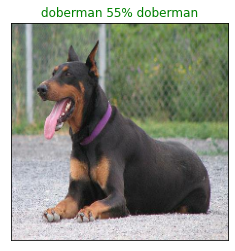

In [ ]:
plot_pred(pred_prob=prediction, label=val_breeds, image=val_ids,index_num=100 )

# plot top 10 prdictions:

In [ ]:
def pred_plot_conf(prediction,label,index_num):
    pred_prob=prediction[index_num]
    true_label=label[index_num]
    pred_label=get_pred_label(pred_prob)
    
    pred_index=pred_prob.argsort()[-10:][::-1]
    pred_value=pred_prob[pred_index]
    pred_label=tot_breeds[pred_index]

    top_plot=plt.bar(np.arange(len(pred_label)),
                     pred_value,color='grey')
    
    plt.xticks(np.arange(len(pred_label)),
              pred_label,rotation='vertical')
    
    if np.isin(true_label,pred_label):
        top_plot[np.argmax(pred_label==true_label)].set_color("green")
        
    else:
        pass

    

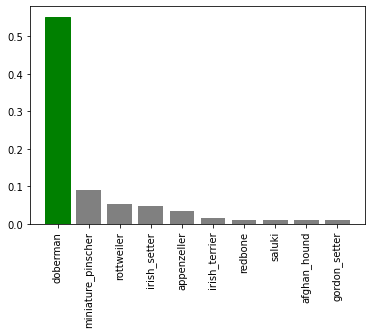

In [ ]:
pred_plot_conf(prediction, label=val_breeds, index_num=100)

Now we've got some function to help us visualize our predictions and evaluate our modle, let's check out a few.



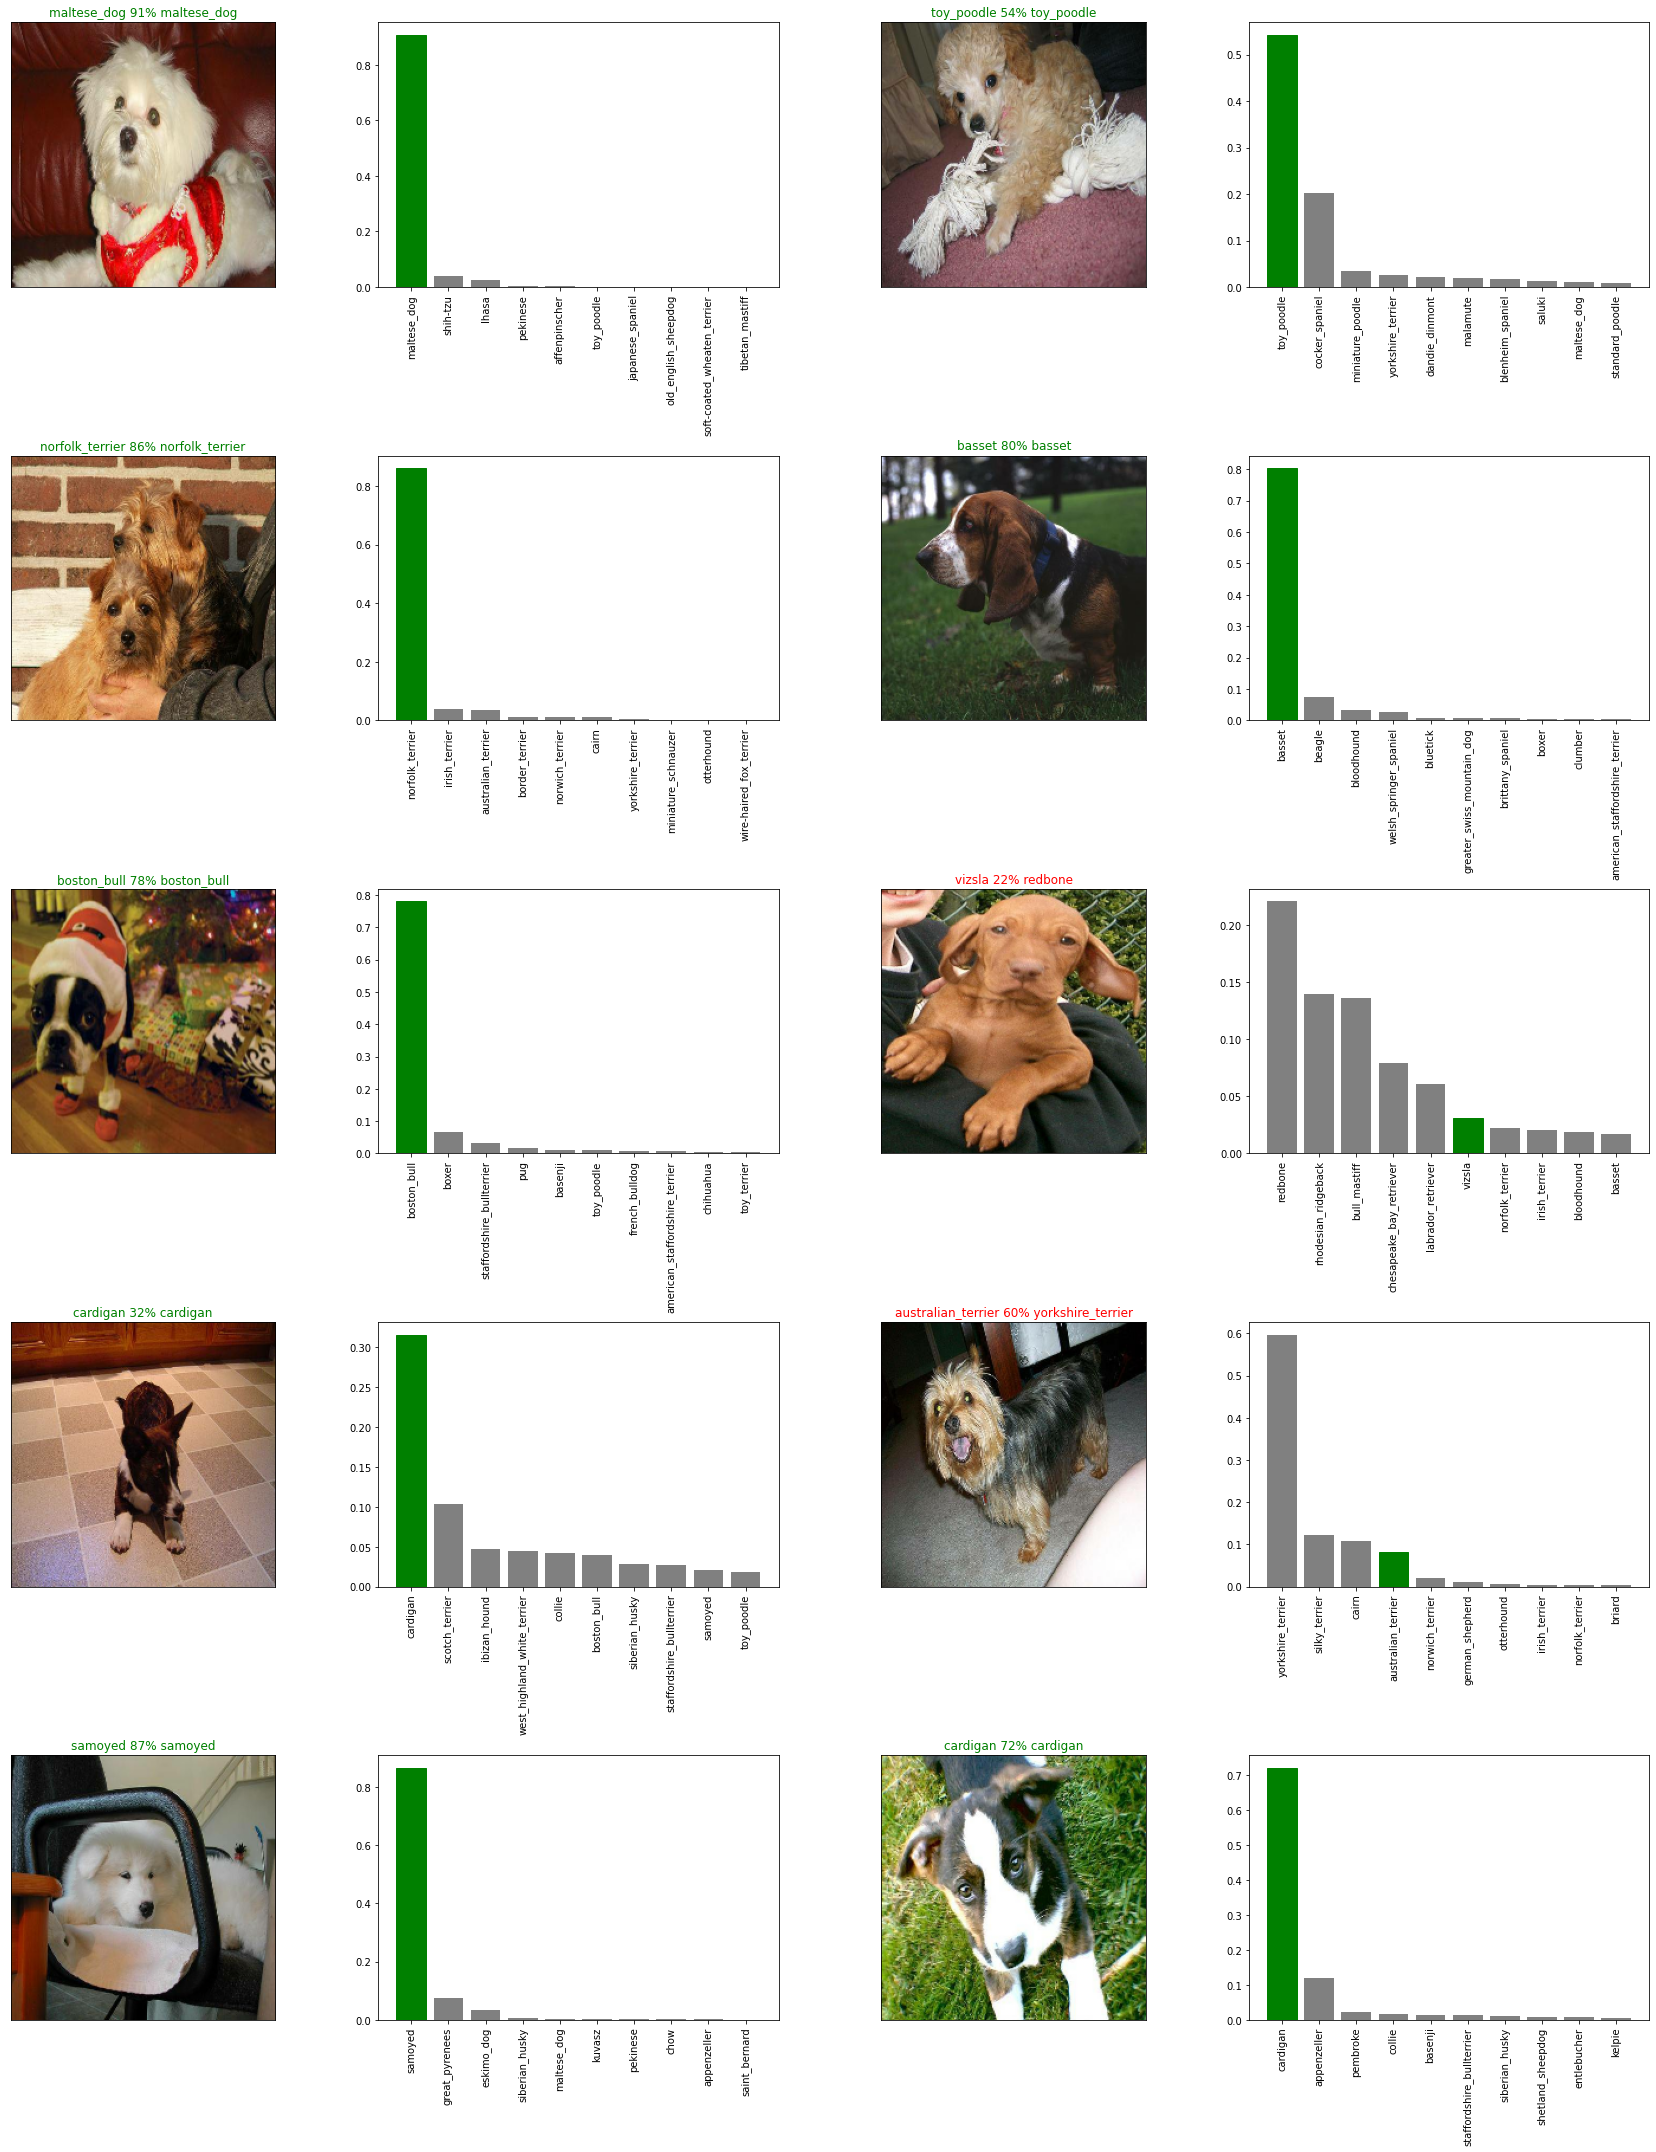

In [ ]:
# Let's check out a few predictions and their different values
multiplier = 10 #@param{type:"slider" ,min:0,max:190,step:10}
num_rows = 5 #@param{type:"slider" ,min:1,max:10}
num_cols = 2 #@param{type:"slider" ,min:1,max:10}
num_images = num_rows*num_cols

plt.figure(figsize=(12*num_cols,6*num_rows))
for i in range(num_images):
 
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(pred_prob=prediction,
            label=val_breeds, 
            image=val_ids,
            index_num=i+multiplier)
  
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  pred_plot_conf(prediction, label=val_breeds, index_num=i+multiplier)
  
  
plt.tight_layout(h_pad=1.0) 
plt.show()

## Saving the Model

In [ ]:
def save_model(model,suffix=None):
    checkpoint=os.path.join("/content/drive/MyDrive/DOG_Sight/dog-breed-identification/model",datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    model_dir=checkpoint+"_"+suffix+'.h5'
    print(f'saving model to:{model_dir}.....')
    model.save(model_dir)
    return model_dir

In [ ]:
#save_model(model,suffix= "1000_images_mobilenetv2")





### Loading Model:

In [ ]:
def load_model(model_path):
    print(f"loaded from :{model_path}")
    model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
    return model

In [ ]:
image_model=load_model("/content/drive/MyDrive/DOG_Sight/dog-breed-identification/model/20220114-141444_1000_images_mobilenetv2.h5")

loaded from :/content/drive/MyDrive/DOG_Sight/dog-breed-identification/model/20220114-141444_1000_images_mobilenetv2.h5


In [ ]:
image_model.evaluate(val_data)

7/7 [==============================] - 9s 1s/step - loss: 0.1972 - accuracy: 0.9550


[0.1972218155860901, 0.9549999833106995]

# train a full dog model:

In [ ]:
len(x),len(y)

(10222, 10222)

In [ ]:
#creating batches:

full_data=create_data_batches(x,y)
full_data
full_model=create_model()

creating training data


In [ ]:
#creating calling tensor board:

full_model_tensorboard=create_tensorboard_callback()
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)


In [ ]:
#fitting the model:

full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/10
320/320 [==============================] - 410s 1s/step - loss: 1.3345 - accuracy: 0.6665
Epoch 2/10
320/320 [==============================] - 410s 1s/step - loss: 0.3993 - accuracy: 0.8831
Epoch 3/10
320/320 [==============================] - 409s 1s/step - loss: 0.2347 - accuracy: 0.9366
Epoch 4/10
320/320 [==============================] - 409s 1s/step - loss: 0.1537 - accuracy: 0.9630
Epoch 5/10
320/320 [==============================] - 408s 1s/step - loss: 0.1055 - accuracy: 0.9786
Epoch 6/10
320/320 [==============================] - 409s 1s/step - loss: 0.0771 - accuracy: 0.9869
Epoch 7/10
320/320 [==============================] - 410s 1s/step - loss: 0.0557 - accuracy: 0.9929
Epoch 8/10
320/320 [==============================] - 409s 1s/step - loss: 0.0446 - accuracy: 0.9944
Epoch 9/10
320/320 [==============================] - 410s 1s/step - loss: 0.0374 - accuracy: 0.9959
Epoch 10/10
320/320 [==============================] - 412s 1s/step - loss: 0.0310 - accura

In [ ]:
#save_model(full_model,suffix='full_image_set_mobilenetv2_adam')

In [ ]:
loaded_full_model=load_model('/content/drive/MyDrive/DOG_Sight/dog-breed-identification/model/20220114-171108_full_image_set_mobilenetv2_adam.h5')

loaded from :/content/drive/MyDrive/DOG_Sight/dog-breed-identification/model/20220114-171108_full_image_set_mobilenetv2_adam.h5


## Making prediction on test path

In [ ]:
test_path="drive/MyDrive/DOG_Sight/dog-breed-identification/test/"
test_file=os.listdir(test_path)

#calling all test files:
test_filenames= [ test_path + fname   for fname in test_file ]
test_data=create_data_batches(test_filenames,test_data=True)

creating test data batches


In [ ]:
test_prediction =loaded_full_model.predict(test_data,verbose=1)

324/324 [==============================] - 1123s 3s/step


In [ ]:
#np.savetxt("drive/MyDrive/DOG_Sight/dog-breed-identification/prediction_array.csv", test_prediction , delimiter =  ",")

In [ ]:
len(test_filenames),test_data,test_path,test_file[3]

(10357,
 <BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>,
 'drive/MyDrive/DOG_Sight/dog-breed-identification/test/',
 'e7afb35b8252782013a6700e28e327fa.jpg')

# preparing test data prediction for kaggle


In [ ]:
df =pd.DataFrame(columns=['id']+list(tot_breeds))
test_id =[os.path.splitext(path)[0] for path in test_file]
df['id']=test_id
df[list(tot_breeds)]=test_prediction


In [ ]:
df.to_csv("drive/MyDrive/DOG_Sight/dog-breed-identification/full_model_prediction.csv", index=False)

In [ ]:
df.head()

id  ... yorkshire_terrier
0  e7b608110b0e29120d8740f37e85f3d0  ...        5.3675e-08
1  e7be7b911a4cba9fdfa4105ec4776370  ...       1.07176e-06
2  e7feb64da6aae1ef8e62453f6660d0c5  ...       0.000329643
3  e7afb35b8252782013a6700e28e327fa  ...       2.76682e-09
4  e826c0ae5dd27876781c10e1be444fd5  ...       5.45221e-08

[5 rows x 121 columns]

### Test model image_data

---



---



In [ ]:
test_path="drive/MyDrive/DOG_Sight/dog-breed-identification/nike/"
test_file=os.listdir(test_path)

nike=[test_path + fname for fname in test_file]

#batching

custom_data=create_data_batches(nike,test_data=True)

creating test data batches


In [ ]:
custom_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
custom_pred= full_model.predict(custom_data)
np.shape(custom_pred)

(4, 120)

In [ ]:
custom_pred_label = [get_pred_label(custom_pred[i]) for i in range (len(custom_pred))]

In [ ]:
custom_pred_label

['great_dane',
 'curly-coated_retriever',
 'labrador_retriever',
 'staffordshire_bullterrier']

In [ ]:
images = []
for image in custom_data.unbatch().as_numpy_iterator():
    images.append(image)

In [ ]:
np.shape(images)

(4, 224, 224, 3)

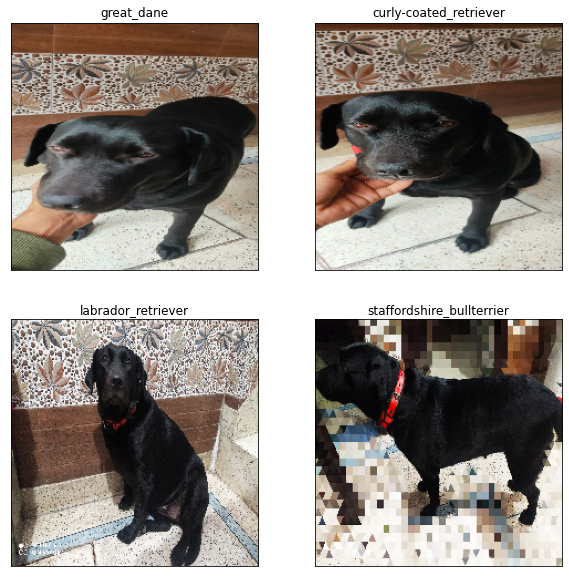

In [ ]:
plt.figure(figsize=(10,10))
for i , image in enumerate(images):
    plt.subplot(2,2,i+1)
    plt.title(custom_pred_label[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    